<a href="https://colab.research.google.com/github/mhndlsz/stock-prediction-Lasso/blob/master/stock_prediction_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 3, 6)

df = web.DataReader("TSLA", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-28,320.000000,310.809998,318.920013,319.880005,10520700,319.880005
2019-03-01,307.130005,291.899994,306.940002,294.790009,22911400,294.790009
2019-03-04,299.000000,282.779999,298.119995,285.359985,17096800,285.359985
2019-03-05,284.000000,270.100006,282.000000,276.540009,18764700,276.540009
2019-03-06,281.510010,274.390015,276.480011,276.239990,10335500,276.239990


In [0]:
df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,HL_PCT,PCT_change
Date,,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,31.226452,25.736839
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,29.878308,-7.599848
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,25.728597,-12.160004
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.864589,-16.521736
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,25.884543,-19.449997


In [0]:
forecast_col = 'Adj Close'

In [0]:
df.fillna(method='ffill', inplace=True)

In [0]:
forecast_out = 30

In [0]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,HL_PCT,PCT_change,label
Date,,,,,,,,,
2019-02-28,320.000000,310.809998,318.920013,319.880005,10520700,319.880005,2.872953,0.301013,NaN
2019-03-01,307.130005,291.899994,306.940002,294.790009,22911400,294.790009,5.166393,-3.958426,NaN
2019-03-04,299.000000,282.779999,298.119995,285.359985,17096800,285.359985,5.684049,-4.280159,NaN
2019-03-05,284.000000,270.100006,282.000000,276.540009,18764700,276.540009,5.026395,-1.936167,NaN
2019-03-06,281.510010,274.390015,276.480011,276.239990,10335500,276.239990,2.577467,-0.086813,NaN


In [9]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,HL_PCT,PCT_change,label
Date,,,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,31.226452,25.736839,17.900000
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,29.878308,-7.599848,17.600000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,25.728597,-12.160004,18.320000
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.864589,-16.521736,18.780001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,25.884543,-19.449997,19.150000


In [0]:
df = df.drop(labels='Adj Close', axis=1)
import numpy as np

X = np.array(df.drop(['label'], 1))

In [11]:
X

array([[ 2.50000000e+01,  1.75400009e+01,  1.90000000e+01, ...,
         1.87663000e+07,  3.12264515e+01,  2.57368389e+01],
       [ 3.04200001e+01,  2.32999992e+01,  2.57900009e+01, ...,
         1.71871000e+07,  2.98783083e+01, -7.59984848e+00],
       [ 2.59200001e+01,  2.02700005e+01,  2.50000000e+01, ...,
         8.21880000e+06,  2.57285968e+01, -1.21600037e+01],
       ...,
       [ 2.99000000e+02,  2.82779999e+02,  2.98119995e+02, ...,
         1.70968000e+07,  5.68404894e+00, -4.28015899e+00],
       [ 2.84000000e+02,  2.70100006e+02,  2.82000000e+02, ...,
         1.87647000e+07,  5.02639527e+00, -1.93616718e+00],
       [ 2.81510010e+02,  2.74390015e+02,  2.76480011e+02, ...,
         1.03355000e+07,  2.57746719e+00, -8.68130579e-02]])

In [12]:
from sklearn import preprocessing

X = preprocessing.scale(X)
X

array([[-1.30667175, -1.35971343, -1.35240475, ...,  3.01495263,
        11.25182058,  9.23351503],
       [-1.26049121, -1.30903069, -1.29365609, ...,  2.66744138,
        10.69560255, -2.72618777],
       [-1.29883299, -1.33569192, -1.30049136, ...,  0.69391992,
         8.98351129, -4.36216618],
       ...,
       [ 1.0279164 ,  0.97415691,  1.06260644, ...,  2.64757039,
         0.7135158 , -1.53523262],
       [ 0.90011048,  0.86258453,  0.92313249, ...,  3.01460054,
         0.44218053, -0.69431387],
       [ 0.87889478,  0.90033269,  0.87537226, ...,  1.15971086,
        -0.56820016, -0.03084886]])

In [0]:
X_lately = X[-forecast_out:]

In [0]:
X = X[:-forecast_out]

In [15]:
X

array([[-1.30667175, -1.35971343, -1.35240475, ...,  3.01495263,
        11.25182058,  9.23351503],
       [-1.26049121, -1.30903069, -1.29365609, ...,  2.66744138,
        10.69560255, -2.72618777],
       [-1.29883299, -1.33569192, -1.30049136, ...,  0.69391992,
         8.98351129, -4.36216618],
       ...,
       [ 1.47523712,  1.51415696,  1.47869229, ..., -0.30559302,
        -0.7584826 ,  0.11428227],
       [ 1.26759514,  1.12330158,  1.27787404, ...,  4.1998401 ,
         2.10844821, -2.3032878 ],
       [ 1.10459995,  1.08608133,  1.12057651, ...,  1.5406705 ,
         0.09368401, -0.69409836]])

In [16]:
df.head()

,High,Low,Open,Close,Volume,HL_PCT,PCT_change,label
Date,,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,31.226452,25.736839,17.900000
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,29.878308,-7.599848,17.600000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,25.728597,-12.160004,18.320000
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,22.864589,-16.521736,18.780001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,25.884543,-19.449997,19.150000


In [17]:
df.tail()

,High,Low,Open,Close,Volume,HL_PCT,PCT_change,label
Date,,,,,,,,
2019-02-28,320.000000,310.809998,318.920013,319.880005,10520700,2.872953,0.301013,NaN
2019-03-01,307.130005,291.899994,306.940002,294.790009,22911400,5.166393,-3.958426,NaN
2019-03-04,299.000000,282.779999,298.119995,285.359985,17096800,5.684049,-4.280159,NaN
2019-03-05,284.000000,270.100006,282.000000,276.540009,18764700,5.026395,-1.936167,NaN
2019-03-06,281.510010,274.390015,276.480011,276.239990,10335500,2.577467,-0.086813,NaN


In [0]:
df.dropna(inplace=True)

In [19]:
df.tail()

,High,Low,Open,Close,Volume,HL_PCT,PCT_change,label
Date,,,,,,,,
2019-01-15,348.799988,334.500000,335.000000,344.429993,6056600,4.151784,2.814923,319.880005
2019-01-16,352.000000,343.500000,344.779999,346.049988,4691700,2.456293,0.368348,294.790009
2019-01-17,351.500000,344.149994,346.209991,347.309998,3676700,2.116267,0.317728,285.359985
2019-01-18,327.130005,299.730011,323.000000,302.260010,24150800,9.065041,-6.421050,276.540009
2019-01-22,308.000000,295.500000,304.820007,298.920013,12066700,4.181721,-1.935566,276.239990


In [0]:
y = np.array(df['label'])

In [21]:
y

array([ 17.89999962,  17.60000038,  18.31999969, ..., 285.35998535,
       276.54000854, 276.23999023])

In [0]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [23]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
confidencelasso_reg = lasso_reg.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3967.997086456511, tolerance: 2293.010568507625
  positive)


In [24]:
confidencelasso_reg

0.9415588048855059

In [25]:
forecast_set_lasso_reg = lasso_reg.predict(X_lately)
forecast_set_lasso_reg

array([295.29493223, 288.75936488, 294.91524986, 292.38767402,
       292.51765933, 310.19833357, 309.90486504, 309.73872987,
       307.88176666, 316.63503969, 315.53478581, 306.45199898,
       300.92268178, 313.9185327 , 310.35530281, 305.58706889,
       301.41844009, 302.0991207 , 304.05398878, 302.55992128,
       297.7278851 , 293.39609364, 299.77415958, 297.77663846,
       314.34830428, 319.48986682, 319.66597864, 302.90027315,
       293.43101918, 284.0528353 ])

In [0]:
df['Forecast'] = np.nan

In [27]:
df.tail()

,High,Low,Open,Close,Volume,HL_PCT,PCT_change,label,Forecast
Date,,,,,,,,,
2019-01-15,348.799988,334.500000,335.000000,344.429993,6056600,4.151784,2.814923,319.880005,NaN
2019-01-16,352.000000,343.500000,344.779999,346.049988,4691700,2.456293,0.368348,294.790009,NaN
2019-01-17,351.500000,344.149994,346.209991,347.309998,3676700,2.116267,0.317728,285.359985,NaN
2019-01-18,327.130005,299.730011,323.000000,302.260010,24150800,9.065041,-6.421050,276.540009,NaN
2019-01-22,308.000000,295.500000,304.820007,298.920013,12066700,4.181721,-1.935566,276.239990,NaN


In [28]:
df.head()

,High,Low,Open,Close,Volume,HL_PCT,PCT_change,label,Forecast
Date,,,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,31.226452,25.736839,17.900000,NaN
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,29.878308,-7.599848,17.600000,NaN
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,25.728597,-12.160004,18.320000,NaN
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,22.864589,-16.521736,18.780001,NaN
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,25.884543,-19.449997,19.150000,NaN


In [29]:
last_date = df.iloc[-1].name
last_date

Timestamp('2019-01-22 00:00:00')

In [30]:
last_unix = last_date.timestamp()
last_unix

1548115200.0

In [0]:
one_day = 86400

In [32]:
next_unix = last_unix + one_day
next_unix

1548201600.0

In [0]:
for i in forecast_set_lasso_reg:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [34]:
df.tail(20)

,High,Low,Open,Close,Volume,HL_PCT,PCT_change,label,Forecast
Date,,,,,,,,,
2019-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315.534786
2019-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306.451999
2019-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.922682
2019-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313.918533
2019-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310.355303
2019-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.587069
2019-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301.418440
2019-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.099121
2019-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304.053989


In [35]:
df.head()

,High,Low,Open,Close,Volume,HL_PCT,PCT_change,label,Forecast
Date,,,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300.0,31.226452,25.736839,17.900000,NaN
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100.0,29.878308,-7.599848,17.600000,NaN
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800.0,25.728597,-12.160004,18.320000,NaN
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800.0,22.864589,-16.521736,18.780001,NaN
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900.0,25.884543,-19.449997,19.150000,NaN


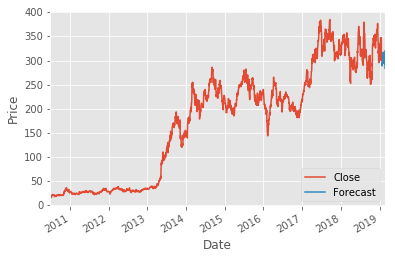

In [36]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()